In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score , roc_curve, auc , log_loss, roc_auc_score ,make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import sklearn.cluster as cluster
from scipy import stats
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier

In [2]:
df= pd.read_csv('heart1.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
mean_value = np.mean(df)
max_value = np.max(df)
min_value = np.min(df)
q25, q50, q75 = np.percentile(df, [25, 50, 75])
print(f"Mean: {mean_value}")
print(f"Maximum: {max_value}")
print(f"Minimum: {min_value}")
print(f"25th Percentile (Q1): {q25}")
print(f"50th Percentile (Median/Q2): {q50}")
print(f"75th Percentile (Q3): {q75}")

Mean: age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64
Maximum: age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64
Minimum: age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64
25th Percentile (Q1): 0.0
50th Percentile (Median/Q2): 1.0
75th Percentile (Q3): 55.0


C:\Users\Admin-PC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Admin-PC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Admin-PC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0, 0.5, 'Number of Patients')

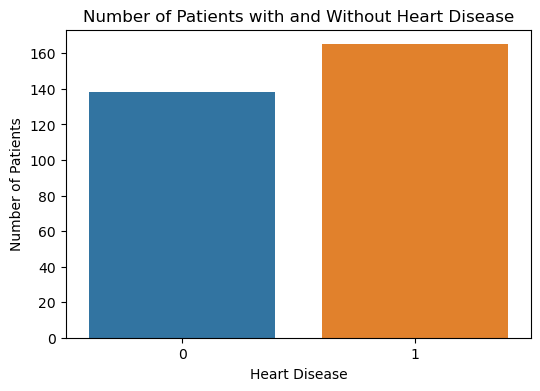

In [15]:
count_by_heart_disease = df['target'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=count_by_heart_disease.index, y=count_by_heart_disease)
plt.title('Number of Patients with and Without Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')

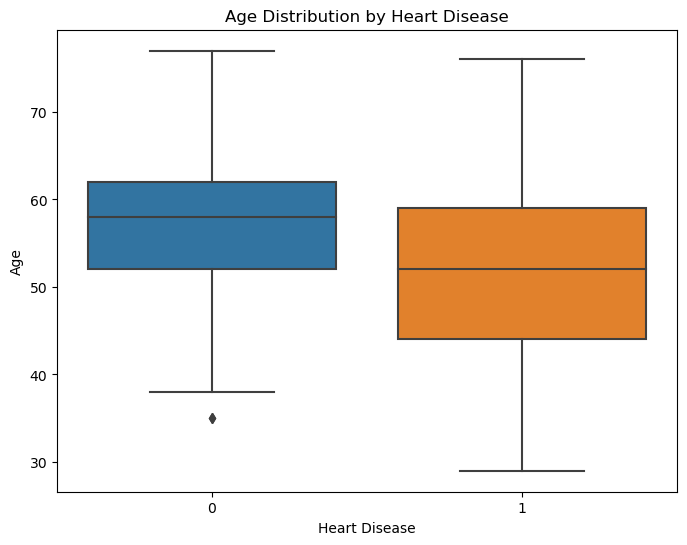

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

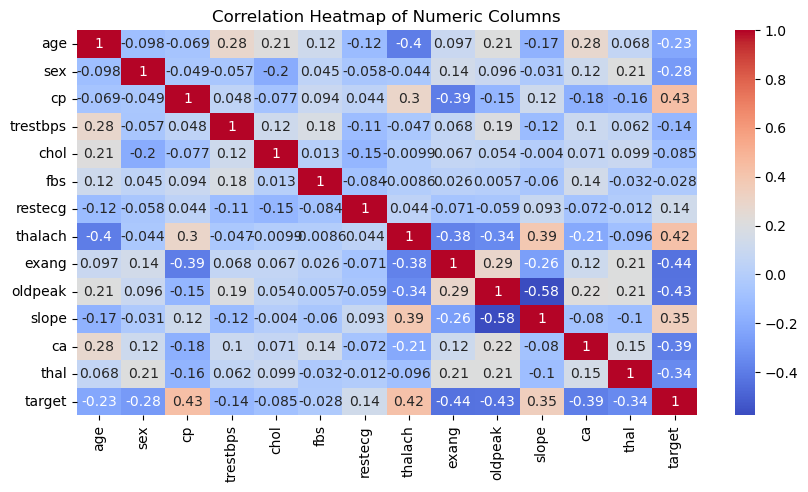

In [19]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [8]:
x=df.iloc[:,:-1]
y= df.iloc[:,-1]
print(x,y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [9]:
# log reg
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3) 
rm= LogisticRegression()

In [10]:
print(x_train,x_test,y_train,y_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
196   46    1   2       150   231    0        1      147      0      3.6   
168   63    1   0       130   254    0        0      147      0      1.4   
139   64    1   0       128   263    0        1      105      1      0.2   
116   41    1   2       130   214    0        0      168      0      2.0   
253   67    1   0       100   299    0        0      125      1      0.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
121   59    1   0       138   271    0        0      182      0      0.0   
225   70    1   0       145   174    0        1      125      1      2.6   
5     57    1   0       140   192    0        1      148      0      0.4   
122   41    0   2       112   268    0        0      172      1      0.0   
31    65    1   0       120   177    0        1      140      0      0.4   

     slope  ca  thal  
196      1   0     2  
168      1   1     3  
139      1   1    

In [11]:
rm.fit(x_train,y_train)
y_pred= rm.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8351648351648352


C:\Users\Admin-PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
lr=confusion_matrix(y_test,y_pred)
lr

array([[34, 10],
       [ 5, 42]], dtype=int64)

In [13]:
f1 = f1_score(y_test, y_pred)
f1

0.8484848484848485

In [14]:
# decision tree
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(x_train, y_train)
y_pred_gini=clf_gini.predict(x_test)
accuracy_score(y_test, y_pred_gini)

0.7142857142857143

In [15]:
dt=confusion_matrix(y_test,y_pred_gini)
dt

array([[32, 12],
       [14, 33]], dtype=int64)

In [16]:
f1_1= f1_score(y_test, y_pred_gini)
f1_1

0.7173913043478262

In [17]:
# random forest
clf1= RandomForestClassifier(min_samples_leaf=2, max_depth=5, random_state=9)
clf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=9)

In [18]:
clf1= RandomForestClassifier(random_state=9)
parameters={'n_estimators':[5,10,5], 'max_features':['log2','sqrt'],'criterion':['entropy' , 'gini'],'max_depth':[2,4,6],'min_samples_split':[2,3,5],'min_samples_leaf':[1,3,5]}


In [19]:
grid_obj= GridSearchCV(clf1,parameters,scoring=make_scorer(accuracy_score))
grid=grid_obj.fit(x_train,y_train)
clf1=grid.best_estimator_
clf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=3,
                       n_estimators=10, random_state=9)

In [20]:
y_pred=clf1.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1], dtype=int64)

In [21]:
accuracy_score(y_test,y_pred)

0.7802197802197802

In [22]:
rf=confusion_matrix(y_test,y_pred)
rf

array([[35,  9],
       [11, 36]], dtype=int64)

In [23]:
f1_2 = f1_score(y_test, y_pred)
f1_2

0.7826086956521738

In [24]:
# print all
print(lr)
print(dt)
print(rf)

[[34 10]
 [ 5 42]]
[[32 12]
 [14 33]]
[[35  9]
 [11 36]]


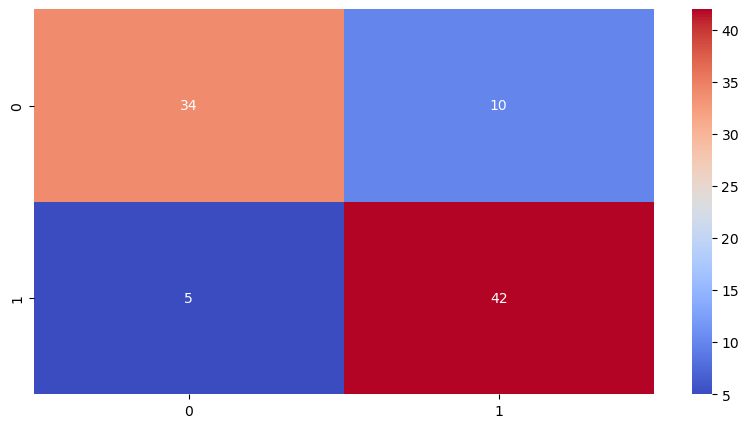

In [25]:
# cols=[lr, dt,rf]

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(lr,annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

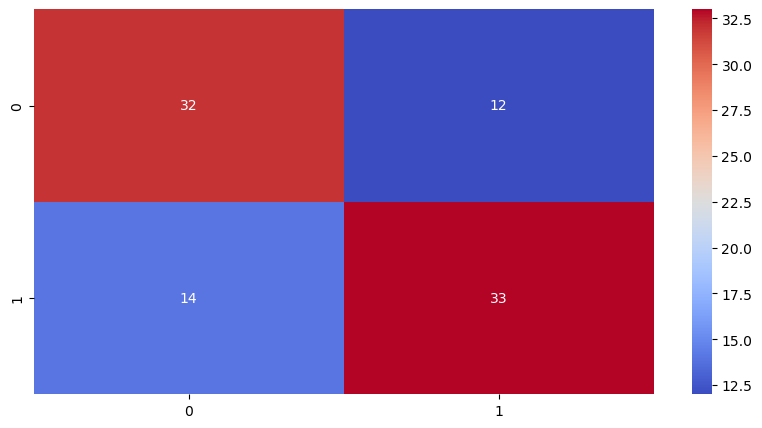

In [26]:
# cols=[lr, dt,rf]

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dt,annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

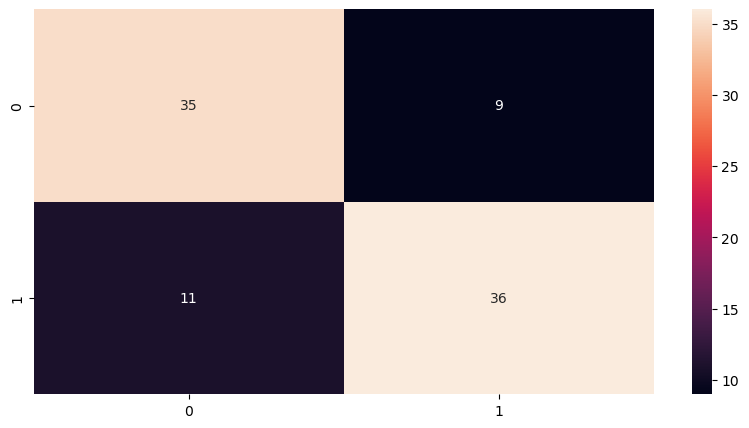

In [29]:
# cols=[lr, dt,rf]

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(rf,annot=True)
# plt.title('Correlation Heatmap of Numeric Columns')
plt.show()